<a href="https://colab.research.google.com/github/AraRG2809/AraRG2809/blob/main/Clase_Decoradores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

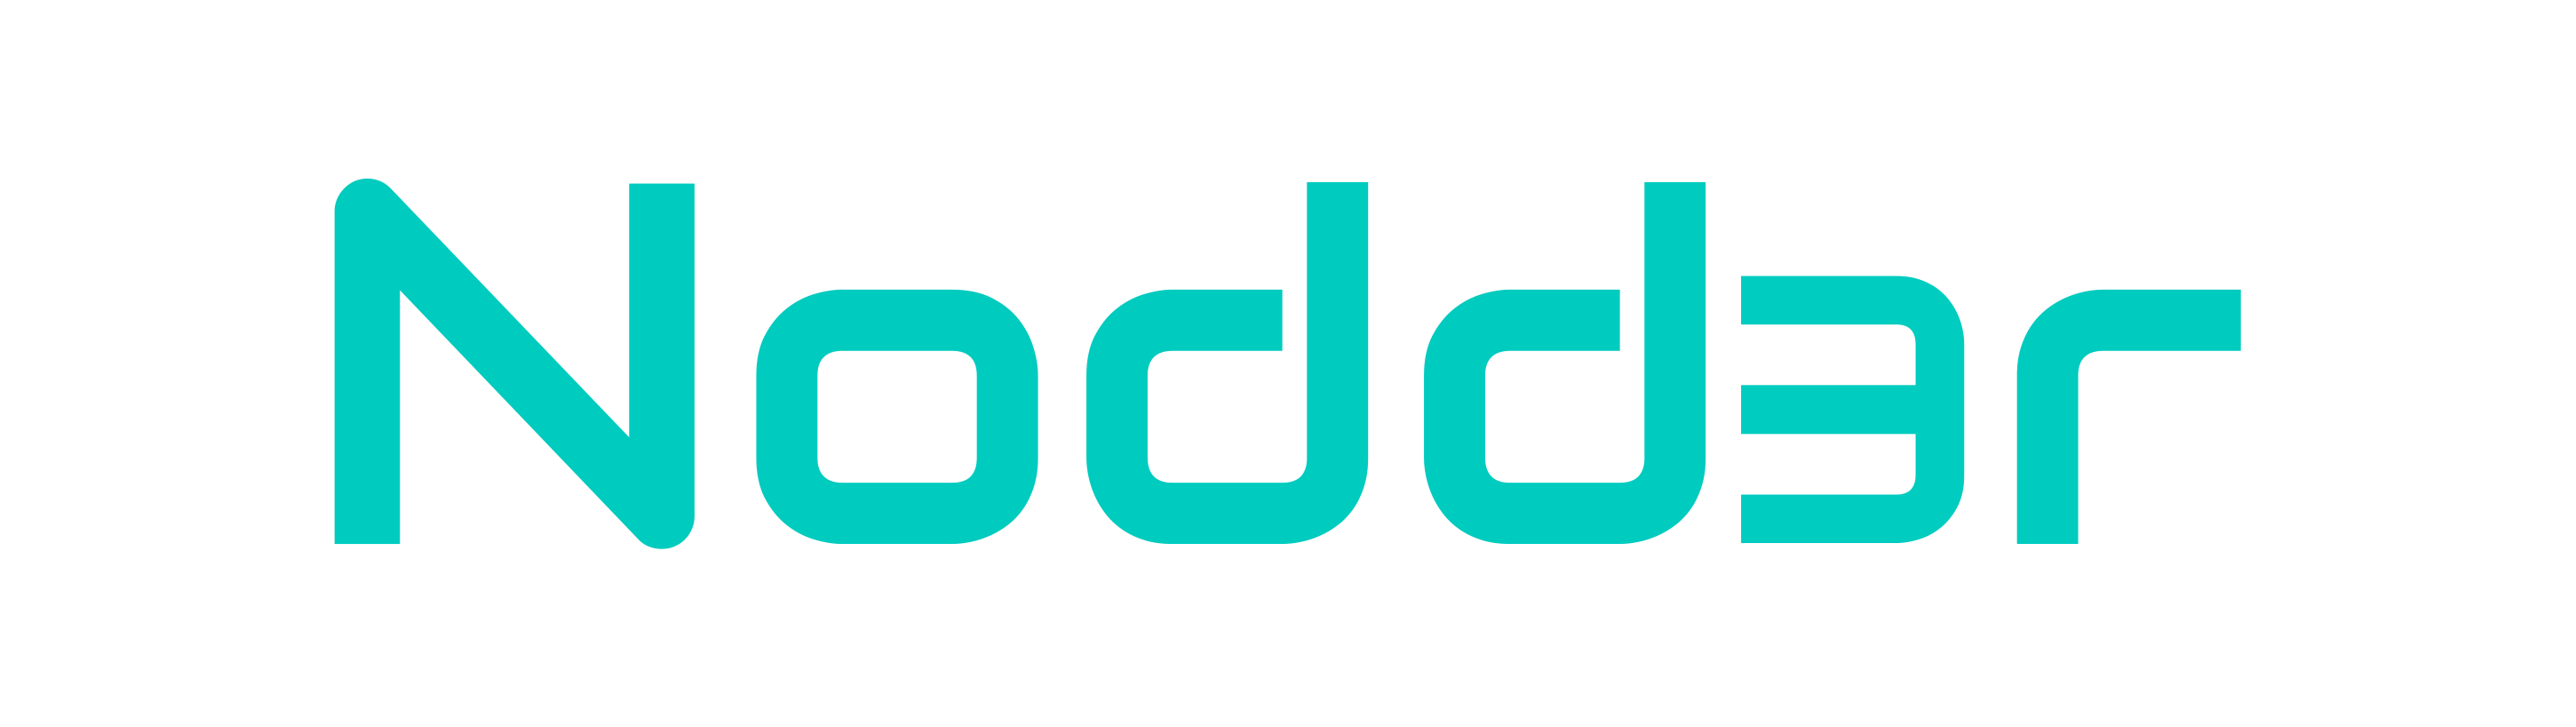


Información de Copyright Copyright 2021 Nodd3r. Todos los derechos reservados

Licencia bajo MIT License. No podrás usar este archivo excepto de acuerdo con la licencia. Antes de usar este código crea una copia en tu Drive.

© Nodd3r: http://nodd3r.com


## **Decoradores**

Todo en Python es un objeto.

Se pueden tratar a las funciones también como objetos.


In [ ]:
# creamos una función ejemplo
def first(msg):
    print(msg)


first("Hello")

# guardamos la función en una variable con otro nombre
second = first
second("Hello")

Hello
Hello


**Funciones como argumento de otras funciones**



Las funciones también pueden ser argumentos de otras funciones, como hemos visto anteriormente con map, filter, o reduce.

A estas funciones se les llama funciones de orden elevado.

In [ ]:
# función incremento
def inc(x):
    return x + 1

# función decremento
def dec(x):
    return x - 1

# función operacion, cuyo argumento es una función
def operate(func, x):
    result = func(x)
    return result

In [ ]:
operate(inc,2)

3

In [ ]:
operate(dec, 3)

2

**Funciones anidadas**

En Python se pueden introducir funciones dentro de otras funciones, en lo que se llama funciones anidadas.

En este caso, hay que tener en cuenta que las funciones anidadas son de solo lectura.

In [ ]:
def print_msg(msg):
    # Función exterior

    def printer():
        # Función anidada
        print(msg)

    printer()

# ejecutamos la función
print_msg("Hello")

Hello


**Funciones como salida de otras funciones**

También una función puede devolver (return) otra función.

In [ ]:
def is_called():
    def is_returned():
        print("Hello")
    return is_returned


new = is_called()

# llamamos a la función con el nuevo nombre
new()

Hello


**Decoradores en Python**

Básicamente, un decorador toma una función, añade alguna funcionalidad y la devuelve.

In [ ]:
# función anidada
def make_pretty(func):
    def inner():
        print("Estoy decorado")
        func()
    return inner

# otra función
def ordinary():
    print("Soy ordinario")

In [ ]:
# creamos objeto pretty con una función dentro de otra
pretty = make_pretty(ordinary)

Esta es una construcción común y por esta razón, Python tiene una sintaxis para simplificar esto.

Podemos utilizar el símbolo @ junto con el nombre de la función decoradora y colocarlo encima de la definición de la función a decorar. Por ejemplo,

In [ ]:
# sintaxis @
@make_pretty
def ordinary():
    print("Soy ordinario")

Es equivalente a

In [ ]:
def ordinary():
    print("Soy ordinario")

# sintaxis convencional
ordinary = make_pretty(ordinary)

**Funciones decoradoras con parámetros**

In [ ]:
# creamos funcion anidada
def smart_divide(func):
    def inner(a, b):
        print("Voy a dividir", a, "y", b)
        if b == 0:
            print("Ups! no se puede dividir")
            return

        return func(a, b)
    return inner

# decoradores
@smart_divide
def divide(a, b):
    print(a/b)

In [ ]:
divide(2,5)

Voy a dividir 2 y 5
0.4


**Encadenando varios decoradores**

En Python se pueden encadenar múltiples decoradores.

Es decir, una función puede ser decorada múltiples veces con diferentes (o los mismos) decoradores. Simplemente colocamos los decoradores encima de la función deseada.


In [ ]:
# primera función
def star(func):
    def inner(*args, **kwargs):
        print("*" * 30)
        func(*args, **kwargs)
        print("*" * 30)
    return inner

# segunda función
def percent(func):
    def inner(*args, **kwargs):
        print("%" * 30)
        func(*args, **kwargs)
        print("%" * 30)
    return inner

# dos decoradores para la nueva función
@star
@percent
def printer(msg):
    print(msg)


printer("Hello")

******************************
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Hello
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
******************************
